This notebook stacks our final images of non-detections (11/21/2020)


#### Final Results [in $\mu$Jy]

- Mean   = 8.6
- Std    = 5.9
- Median = 7.8

The peak pixel in the final stacked image (which coincides with the final 'source') has value ~22µJy/beam

----

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

hdul = fits.open("arrays_11_20_2020/1130+1903.FITS")
print(hdul[0].header["NAXIS1"])
print(hdul[0].section[0:10,0:10].shape)

1280
(1, 1, 1280, 1280)


In [3]:
directory = 'arrays_11_20_2020/'
toBeStacked = [] #contains all image arrays - find median of each pixel


for i in os.listdir(directory): #load up each saved array for each image
    if i.endswith('.FITS'): 
        fitsimg = fits.open(directory+"/"+i)
        if len(fitsimg[0].data.shape) != 1:
            img = np.reshape(fitsimg[0].data, (fitsimg[0].data.shape[2], fitsimg[0].data.shape[3]))
            toBeStacked.append(img[(int(img.shape[0]/2)-30):(int(img.shape[0]/2)+31), \
                                   (int(img.shape[1]/2)-30):(int(img.shape[1]/2)+31)])
            fitsimg.close()

#Forgot to save this FITS, so just use the old array - it was a good img then anyway 
toBeStacked.append(np.reshape(np.load("arrays_of_images/SDSSJ1208+6533.npy"), (61, 61)))
print(len(toBeStacked))

27


In [4]:
medianlist = []
median_array = np.zeros((61,61))
for i in range(median_array.shape[0]):
    for j in range(median_array.shape[1]):
        for image in toBeStacked:
            medianlist.append(image[i,j])         #create list of given pixel flux value for *every* object
        median_array[i,j] = np.median(medianlist) #'place' median pixel in stacked image
        medianlist = []                           #empty list of pixels and move to the next pixel
        
        
print(median_array)  #show resulting median stacked array

[[-1.66944437e-06 -1.74986849e-06 -2.43256250e-06 ... -4.91840137e-06
  -5.20795766e-06 -1.59696890e-06]
 [-1.44962860e-06 -1.13845272e-06 -2.08050733e-06 ... -5.50421601e-06
  -3.97990789e-06 -1.60230138e-06]
 [-7.24870347e-07 -2.29660827e-06 -2.23718143e-06 ... -6.49368894e-06
  -3.58604939e-06 -1.47207834e-06]
 ...
 [ 1.99771216e-06  1.51118456e-06  4.35744852e-07 ...  8.06354990e-07
   3.41715179e-07  4.47693452e-07]
 [ 1.97420195e-06  7.57299858e-07  1.84361147e-06 ...  1.91482343e-07
   1.87680826e-07  2.69201564e-07]
 [ 1.89460286e-06  1.21011271e-06  2.67623363e-08 ... -1.69168220e-06
  -1.52508323e-06 -7.29532815e-07]]


hdu = fits.PrimaryHDU(median_array)
hdul= fits.HDUList([hdu])
hdul.writeto("MEDIAN_STACK.fits")

np.save('stacked_array', median_array)

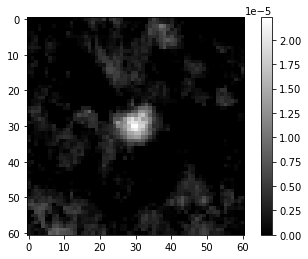

In [5]:
_ = plt.imshow(median_array, cmap="gray", vmin=0.)
plt.colorbar() #in Jy

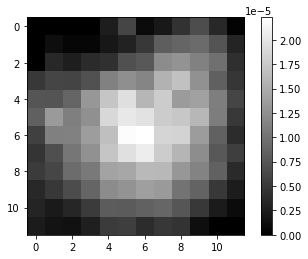

In [6]:
width = 5 #in pixels; actually width/2
targ = median_array[int(len(median_array)/2)-width-1:int(len(median_array)/2)+width+1, \
                    int(len(median_array)/2)-width-1:int(len(median_array)/2)+width+1]

_ = plt.imshow(targ, cmap="gray", vmin=0.)
plt.colorbar() #in Jy

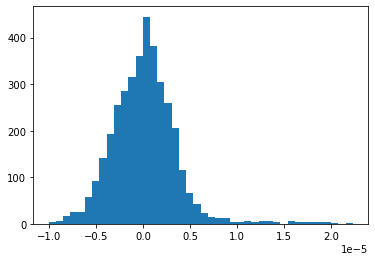

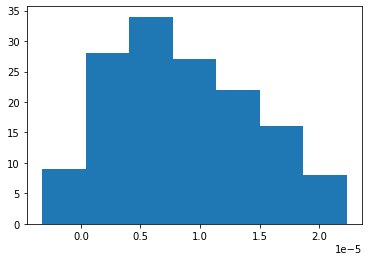

In [7]:
_ = plt.hist(median_array.flatten(), bins="scott")
plt.show()

_ = plt.hist(targ.flatten(), bins="scott")
plt.show()

In [8]:
from scipy.stats import norm

(mu1, sigma1) = norm.fit(median_array)
median1 = np.median(median_array)

(mu2, sigma2) = norm.fit(targ)
median2 = np.median(targ)

In [9]:
print("Gaussian Fits [in µJy] for whole image and central 'target'\n")
print("Entire image:\nMean   = %.2f\nStd    = %.2f\nMedian = %.2f\n" % (mu1*1.e6,sigma1*1.e6,median1*1.e6))
print("Target:\nMean   = %.2f\nStd    = %.2f\nMedian = %.2f\n" % (mu2*1.e6,sigma2*1.e6,median2*1.e6))

Gaussian Fits [in µJy] for whole image and central 'target'

Entire image:
Mean   = 0.11
Std    = 3.46
Median = 0.08

Target:
Mean   = 8.56
Std    = 5.89
Median = 7.83

